# Neuro Screen Capture - Simple Viewer

Set the path to your `.raw` file and the frame index you want to view.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

# --- CONFIGURATION ---
# Replace this with the full or relative path to your .raw file
FILE_PATH = r"inference_optimization\neuro_screen_capture\end2end_tensorrt\build\Release\recordings\Window_1770491200336_512x512.raw"

RESOLUTION_W = 512
RESOLUTION_H = 512
CHANNELS = 3
FPS = 24

def load_recording(path):
    if not os.path.exists(path):
        print(f"Error: File not found at {path}")
        return None
        
    raw_data = np.fromfile(path, dtype=np.uint8)
    frame_size = RESOLUTION_W * RESOLUTION_H * CHANNELS
    num_frames = raw_data.size // frame_size
    
    print(f"Loaded {path}")
    print(f"Total Frames: {num_frames}")
    print(f"Total Size: {raw_data.size / (1024*1024):.2f} MB")
    
    valid_size = num_frames * frame_size
    return raw_data[:valid_size].reshape((num_frames, RESOLUTION_H, RESOLUTION_W, CHANNELS))

video_data = load_recording(FILE_PATH)

Loaded inference_optimization\neuro_screen_capture\end2end_tensorrt\build\Release\recordings\Window_1770491200336_512x512.raw
Total Frames: 172
Total Size: 129.00 MB


## View Specific Frame

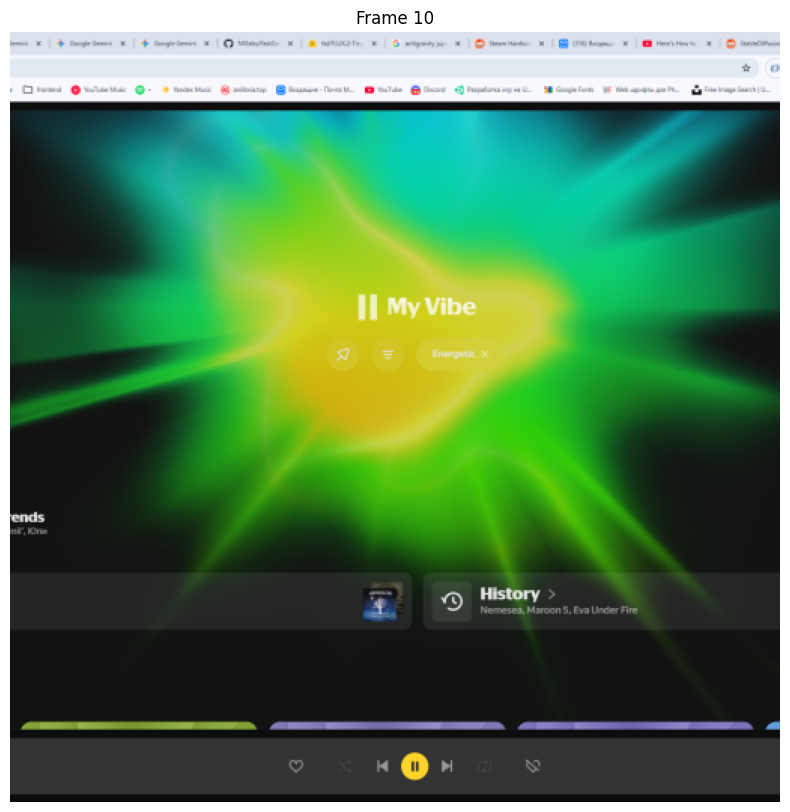

In [4]:
# --- FRAME SELECTION ---
FRAME_IDX = 10  # Change this value to view a different frame

if video_data is not None and FRAME_IDX < len(video_data):
    plt.figure(figsize=(10, 10))
    plt.imshow(video_data[FRAME_IDX])
    plt.title(f"Frame {FRAME_IDX}")
    plt.axis('off')
    plt.show()
else:
    print("Invalid frame index or no data loaded.")

## Export to MP4

In [ ]:
def export_video(output_filename="output.mp4", fps=24):
    if video_data is None: 
        print("No data loaded.")
        return

    print(f"Exporting to {output_filename} at {fps} FPS...")
    
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_filename, fourcc, fps, (RESOLUTION_W, RESOLUTION_H))
    
    for i in range(len(video_data)):
        # Convert RGB (Matplotlib/Raw) to BGR (OpenCV)
        frame_bgr = cv2.cvtColor(video_data[i], cv2.COLOR_RGB2BGR)
        out.write(frame_bgr)
        
        if i % 50 == 0:
            print(f"Processed {i}/{len(video_data)} frames...", end='\r')
            
    out.release()
    print(f"\nDone! Saved to {output_filename}")

# Uncomment to run export
# export_video("converted_recording.mp4")